In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from src.my_random.gen import *
from src.my_random.tests import chi2
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## ex1)

In [6]:
small_geom = geometric(0.01, 10_000)
medium_geom = geometric(.2, 10_000)

big_geom = geometric(.99, 10_000)


<AxesSubplot:ylabel='Probability'>

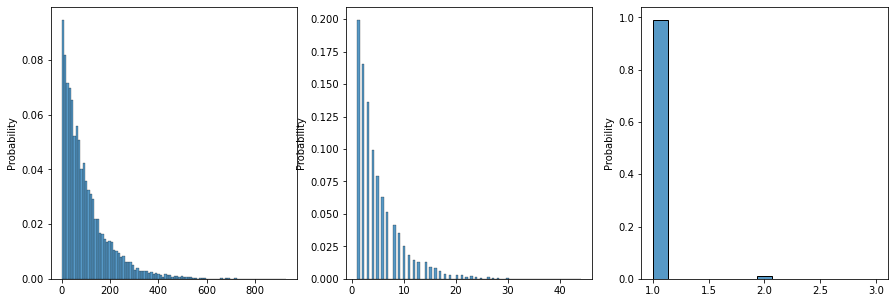

In [22]:
fig, ax = plt.subplots(1,3, figsize=(15, 5))
sns.histplot(small_geom, ax=ax[0], stat='probability')
sns.histplot(medium_geom, ax=ax[1],stat='probability')
sns.histplot(big_geom, ax=ax[2],stat='probability')

## Ex2)

<AxesSubplot:ylabel='Probability'>

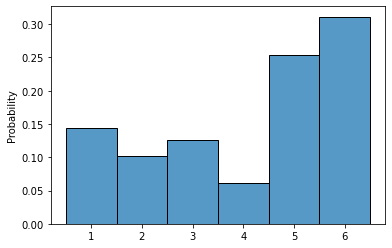

In [23]:
p = [7/48, 5/48, 1/8, 1/16, 1/4, 5/16]
crude = discrete_crude(p, 10_000)
sns.histplot(crude, stat='probability', discrete=True)

<AxesSubplot:ylabel='Probability'>

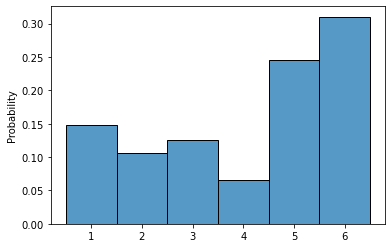

In [24]:
rej = discrete_rejection(p, 10_000)
sns.histplot(rej, stat='probability', discrete=True)

[3 4]
[3 4 5]


[0.14583333333333334, 0.10416666666666667, 0.125, 0.0625, 0.25, 0.3125]

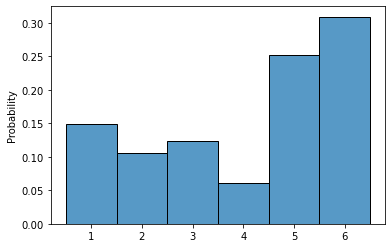

In [25]:
alias = discrete_alias(p, 10_000)
sns.histplot(alias, stat='probability', discrete=True)
p

## Ex3)

In [26]:
print(chi2(np.unique(alias, return_counts=True)[1], np.array(p)*10000),
chi2(np.unique(rej, return_counts=True)[1], np.array(p)*10_000),
chi2(np.unique(crude, return_counts=True)[1], np.array(p)*10_000))

0.8796523475911306 0.626142426234333 0.9234349066060533


All of the methods produce a chi squred p-value well within the confidence of 95%. If at all possible and not too hard to find analytically, the crude method is the way to go. It is computationally inexpensive compared to the other methods and easy to set up. \
The rejection method is very easy to setup, almost no matter how complex the system. However, if some of the categories are very unlikely, a lot of the samples will be rejected which would mean a lot of wasted computational power. \
To fix all these rejctions, the alias method is the way to go. However, the setup of this method requires computations as well. That means, that if you are only gonna need a small sample a couple of times, it may not be worth it computationally.

In [29]:
stats.chisquare(np.unique(rej, return_counts=True)[1], np.array(p)*10_000)[1]

0.626142426234333